In [1]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [3]:
output_dir = "."

In [4]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas/TemporalProblem.pkl")

In [5]:
order_celltypes = ['Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [6]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffbb78', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#aec7e8', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#ffbb78', 'Fev+ Delta,1':'#98df8a',
        'Fev+ Delta,2': '#17becf', 'Ngn3 high cycling': '#aec7e8',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [9]:
tp0.adata.uns["refinement_colors"] = [color_dict[ct] for ct in tp0.adata.obs["refinement"].cat.categories]

In [10]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=True)

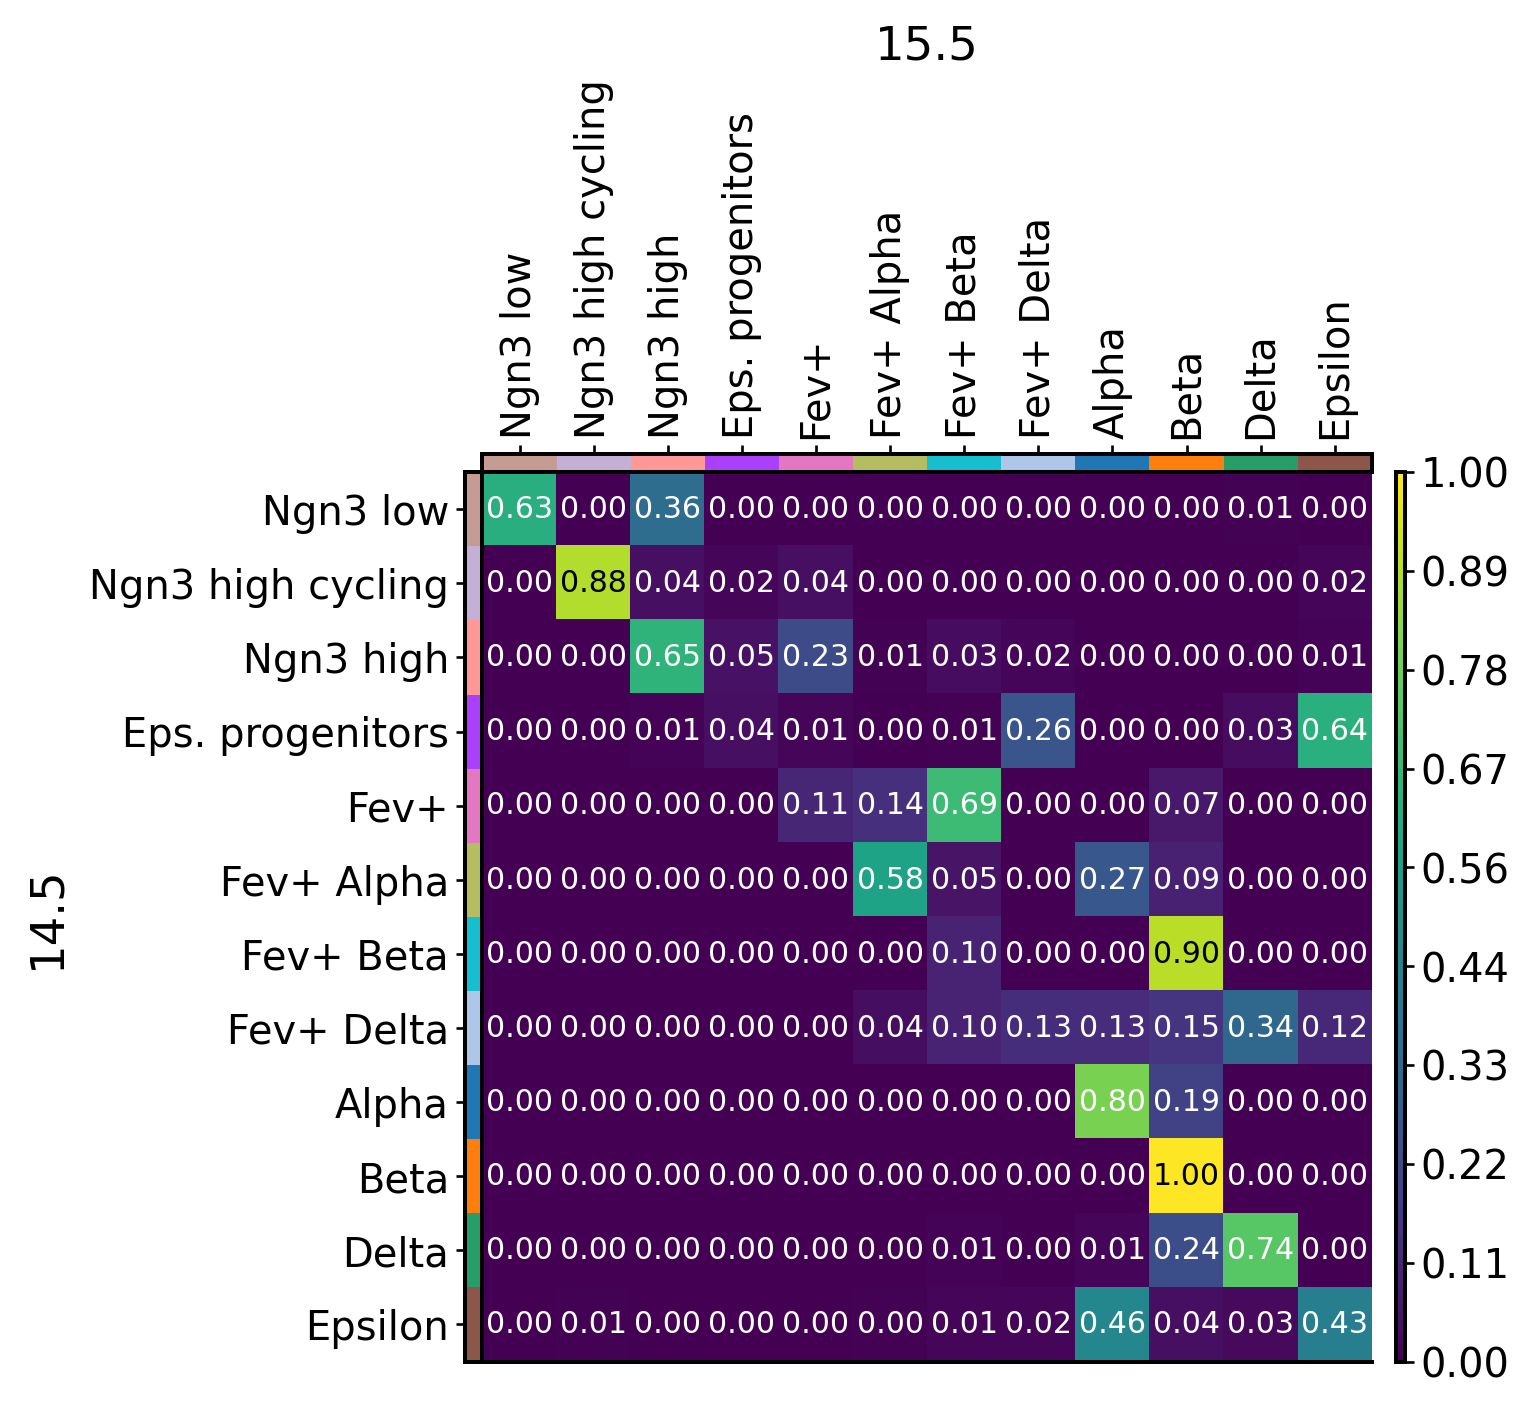

In [11]:
mpl.cell_transition(tp0, dpi=120, fontsize=9, save=os.path.join(output_dir, "cell_transition_endocrine_forward.png"))

In [12]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=False)

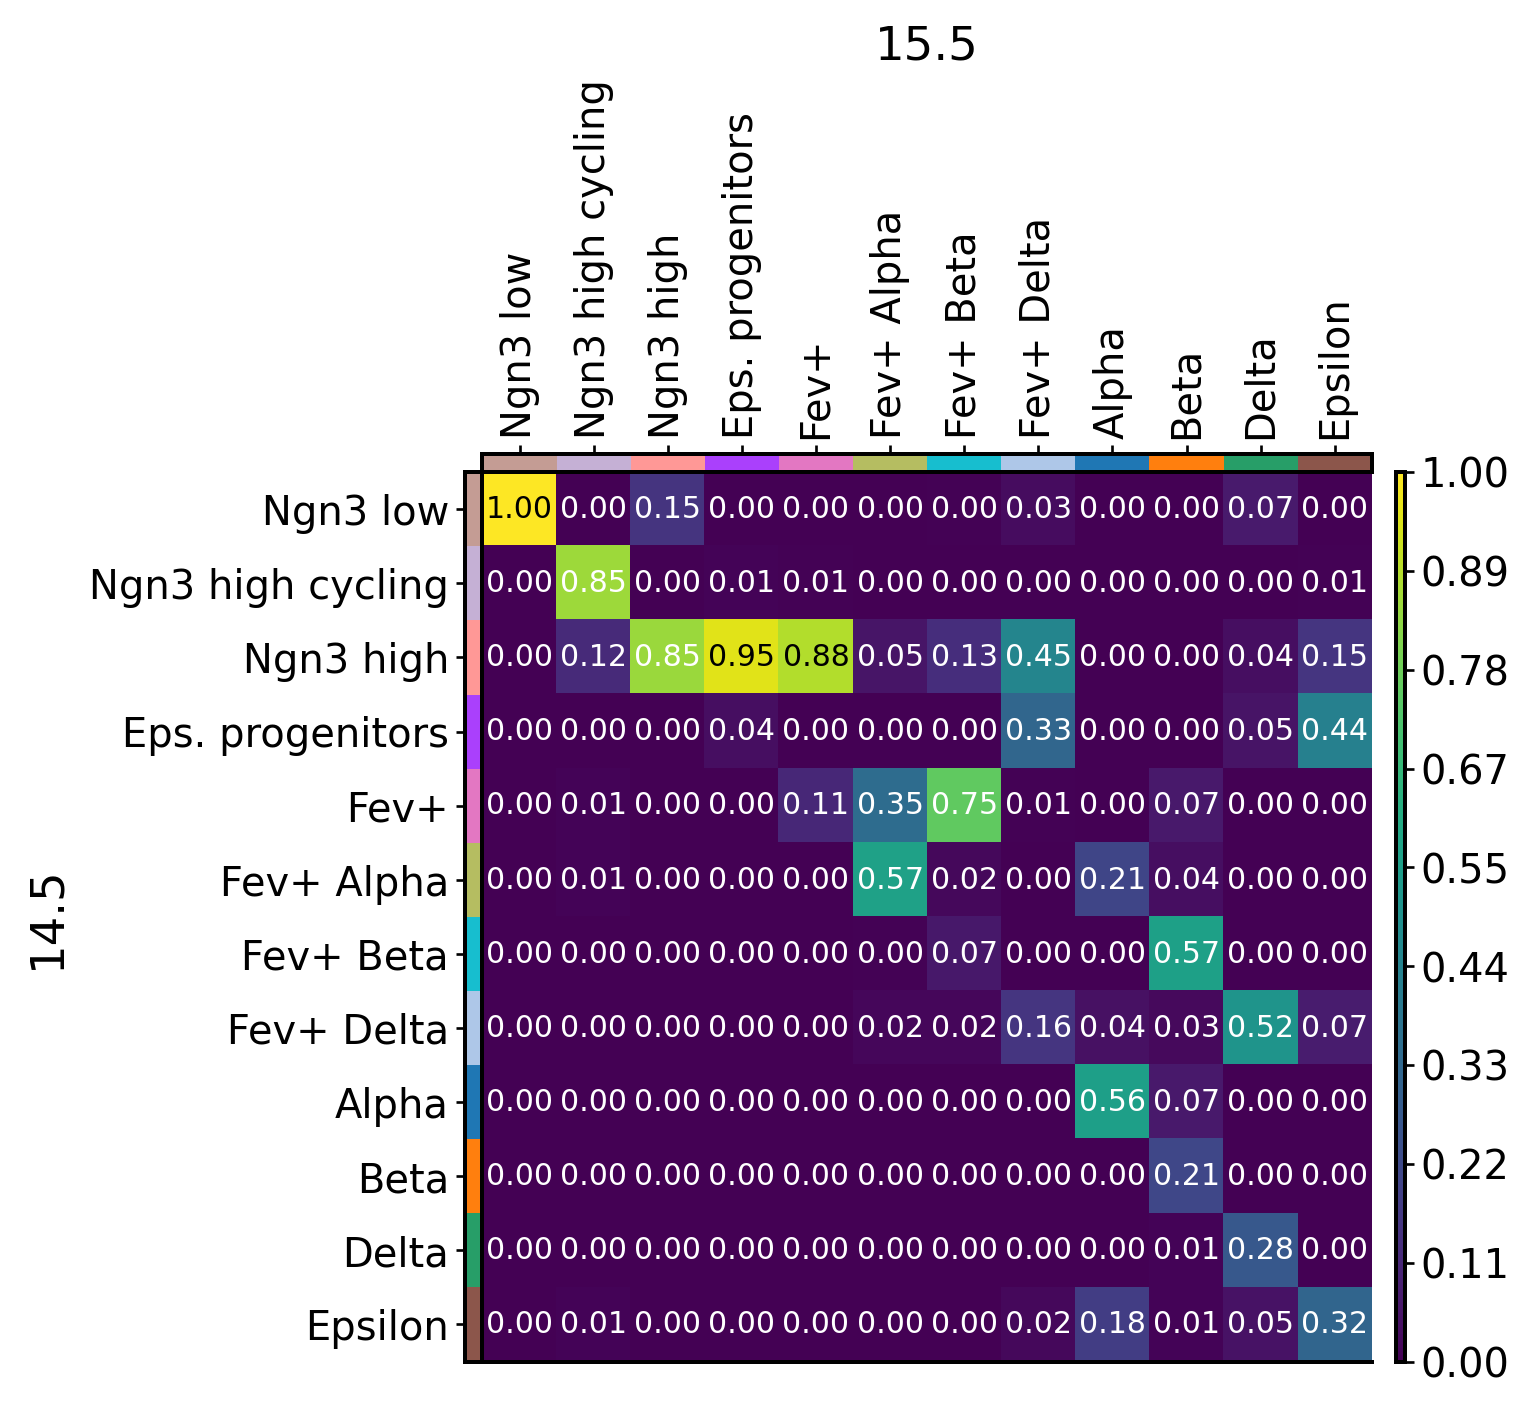

In [13]:
mpl.cell_transition(tp0, dpi=120, fontsize=9, save=os.path.join(output_dir, "cell_transition_endocrine_backward.png"))

In [14]:
tp0.push(14.5, 15.5, data="celltype", subset="Eps. progenitors")

# Epsilon progenitors

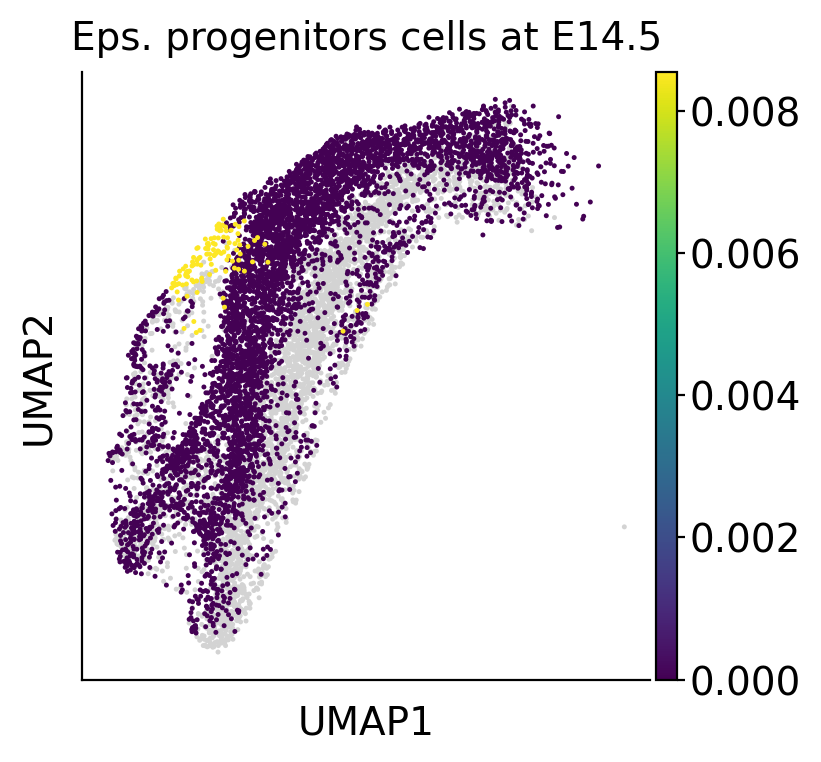

In [17]:
fig = mpl.push(tp0, time_points=[14.5], basis="umap", title="Eps. progenitors cells at E14.5", return_fig=True, save=os.path.join(output_dir, "desc_eps_prog_0.png"))
fig.figure

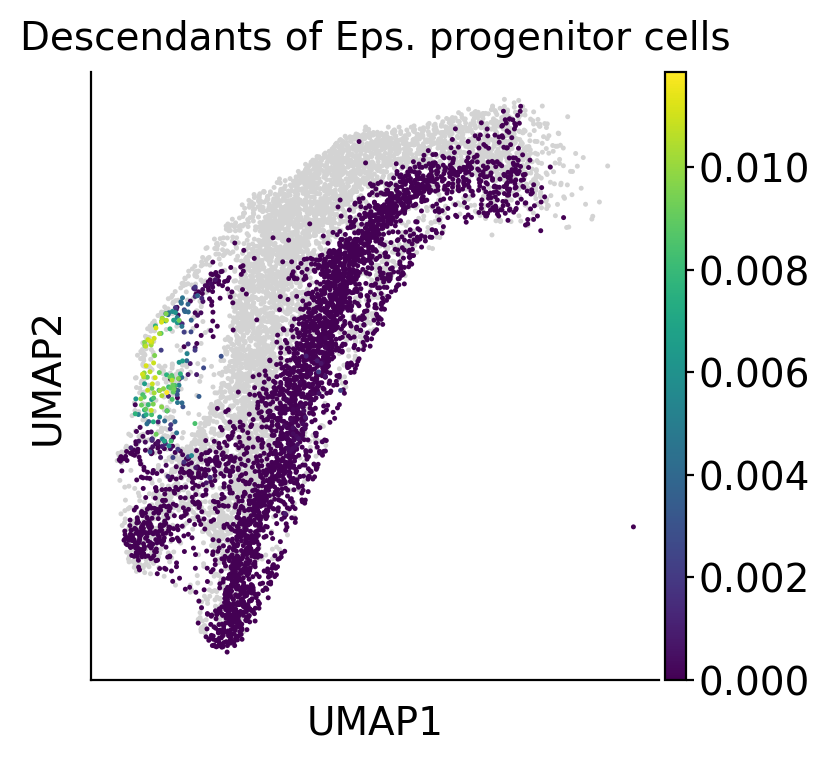

In [19]:
fig = mpl.push(tp0, time_points=[15.5], title="Descendants of Eps. progenitor cells", save=os.path.join(output_dir, "desc_eps_prog_1.png"))
fig.figure

In [20]:
tp0.pull(14.5, 15.5, data="celltype", subset="Eps. progenitors")

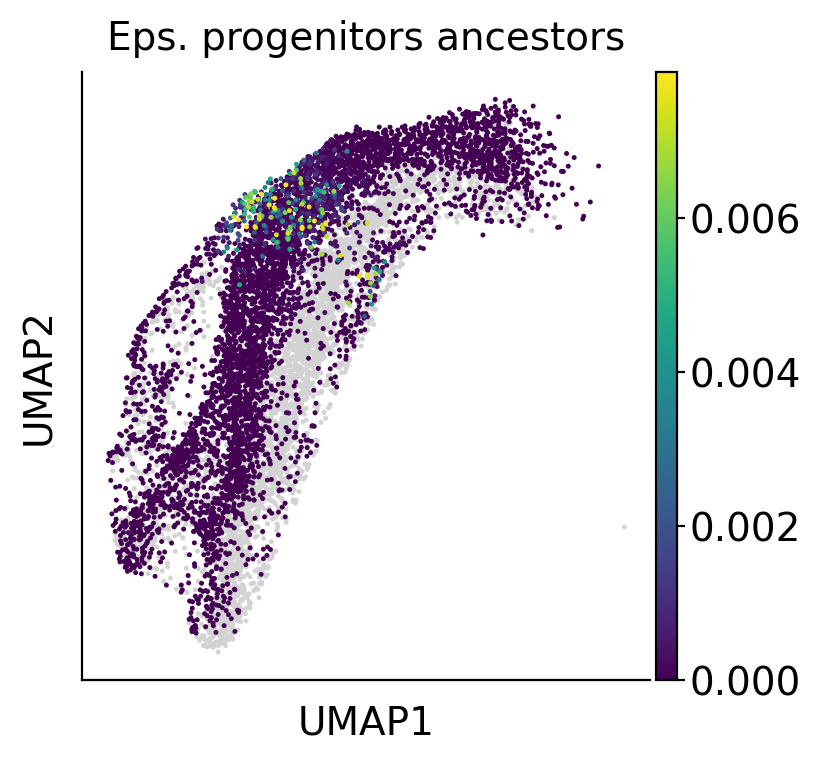

In [23]:
fig = mpl.pull(tp0, time_points=[14.5], basis="umap", title="Eps. progenitors ancestors", return_fig=True, save=os.path.join(output_dir, "anc_eps_prog_0.png"))
fig.figure

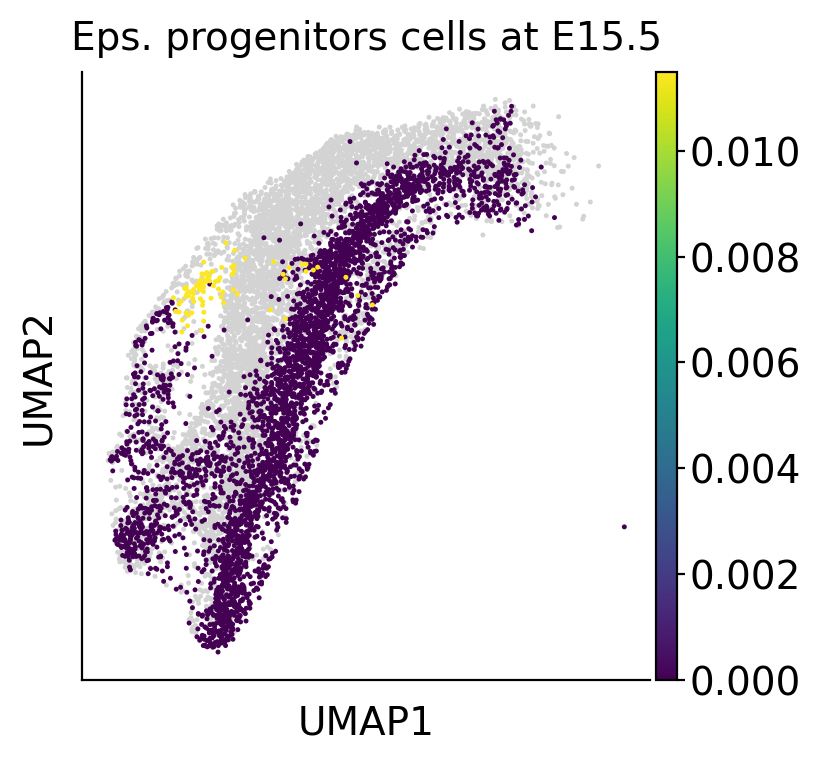

In [24]:
fig = mpl.pull(tp0, time_points=[15.5], basis="umap", title="Eps. progenitors cells at E15.5", return_fig=True, save=os.path.join(output_dir, "anc_eps_prog_1.png"))
fig.figure

# Ngn3 high, 1

In [25]:
tp0.push(14.5, 15.5, data="refinement", subset="Ngn3 high,1")

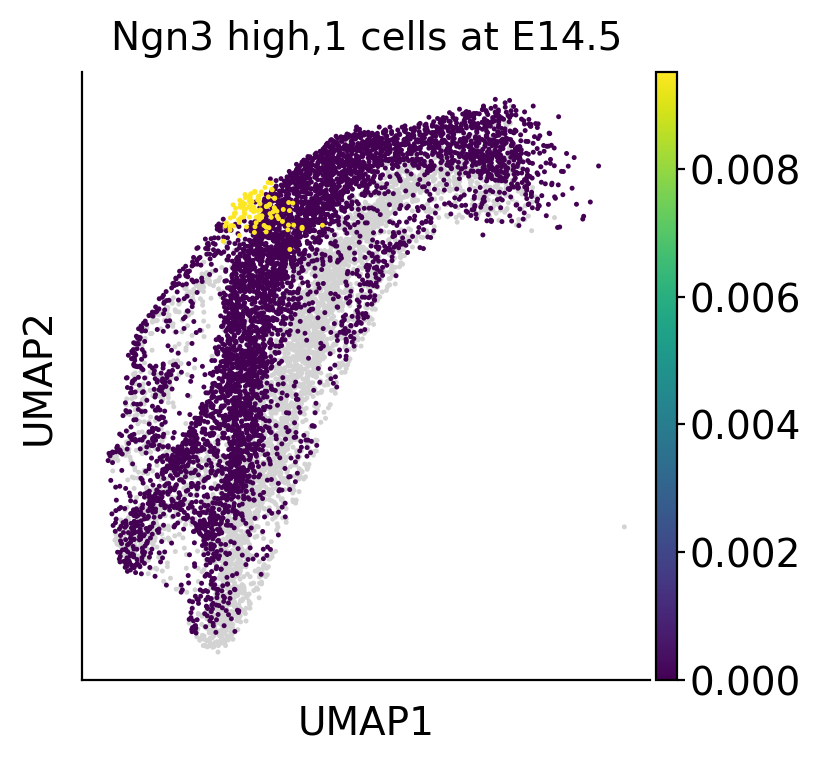

In [28]:
fig = mpl.push(tp0, time_points=[14.5], basis="umap", title="Ngn3 high,1 cells at E14.5", save="desc_ngn3_high_0.png")
fig.figure

In [30]:
fig = mpl.push(tp0, time_points=[15.5], basis="umap", title="Descendants of Ngn3 high,1 cells", save="desc_ngn3_high_1.png")
fig.figure

In [33]:
cluster_subset = ["Ngn3 high,1", "Eps. progenitors", "Fev+ Delta,0", "Fev+ Delta,1", "Fev+ Delta,2", "Epsilon", "Delta"]

In [35]:
_ = tp0.cell_transition(14.5, 15.5, {"refinement": cluster_subset}, {"refinement": cluster_subset}, forward=True)

In [38]:
fig = mpl.cell_transition(tp0, dpi=80, annotate=None, save="cell_transition_reduced_forward")
fig

In [39]:
_ = tp0.cell_transition(14.5, 15.5, {"refinement": cluster_subset}, {"refinement": cluster_subset}, forward=False)

/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(constrained_layout=True, dpi=dpi, figsize=figsize)


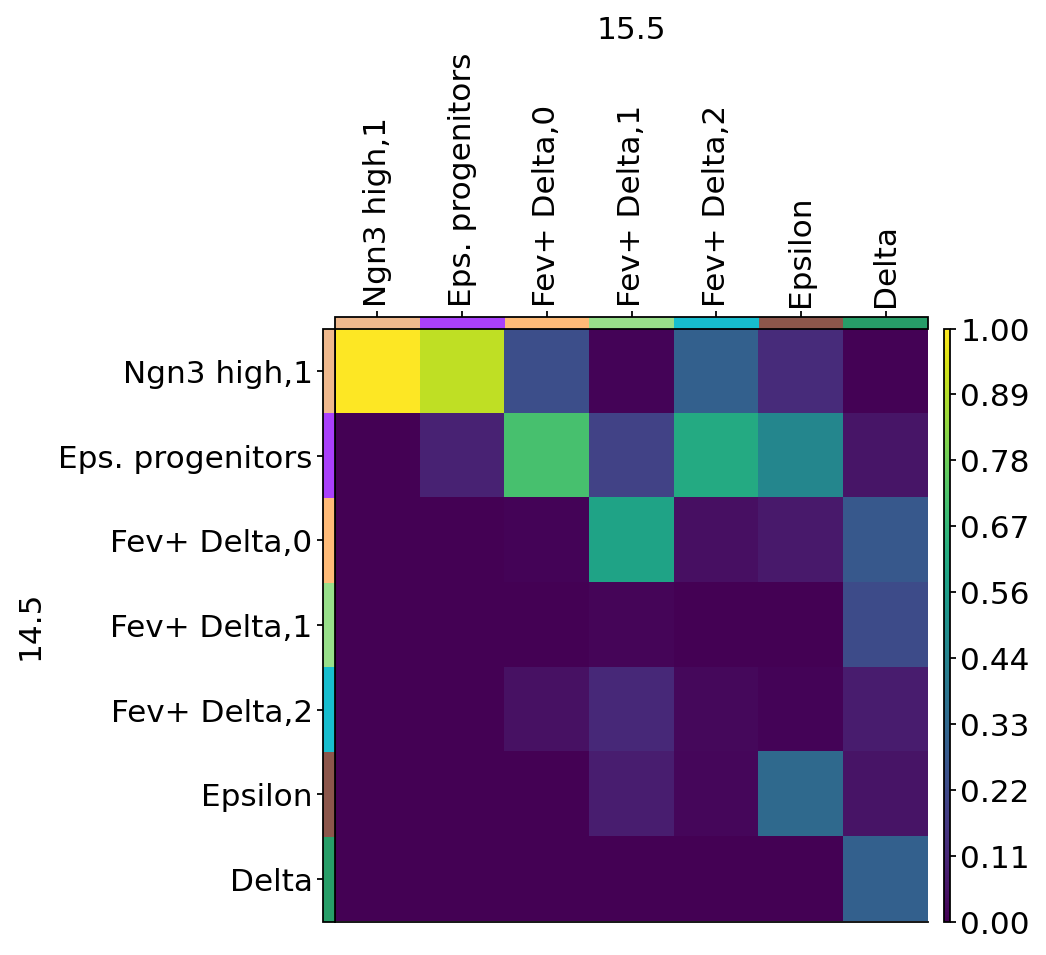

In [40]:
fig = mpl.cell_transition(tp0, dpi=80, annotate=None, save="cell_transition_reduced_backward")
fig

In [41]:
tp0.pull(14.5, 15.5, data="refinement", subset="Epsilon")

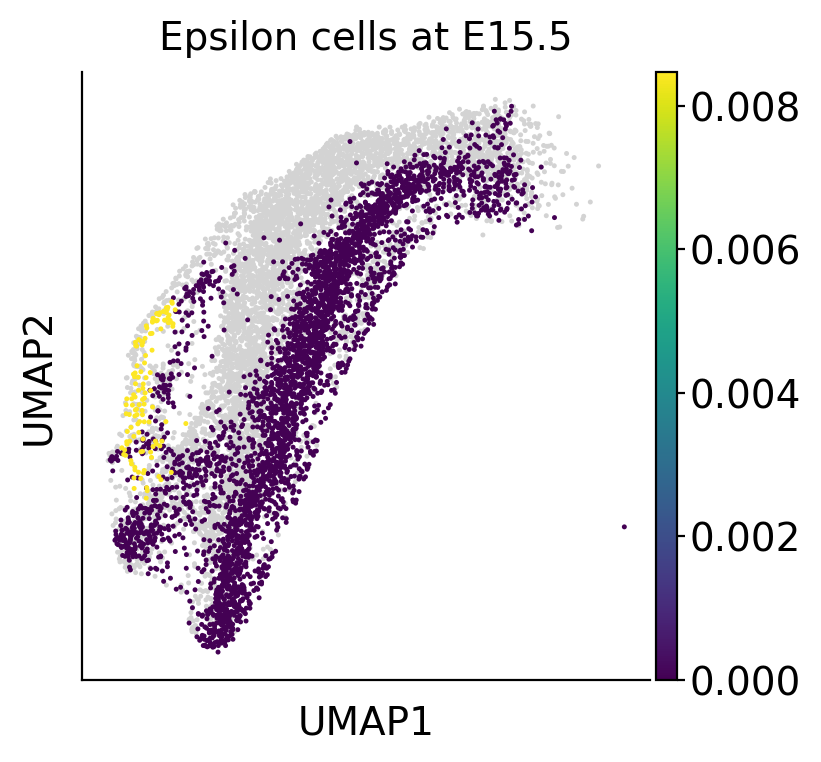

In [44]:
fig = mpl.pull(tp0, time_points=[15.5], basis="umap", title="Epsilon cells at E15.5", save="Epsilon_anc_0.png")
fig.figure

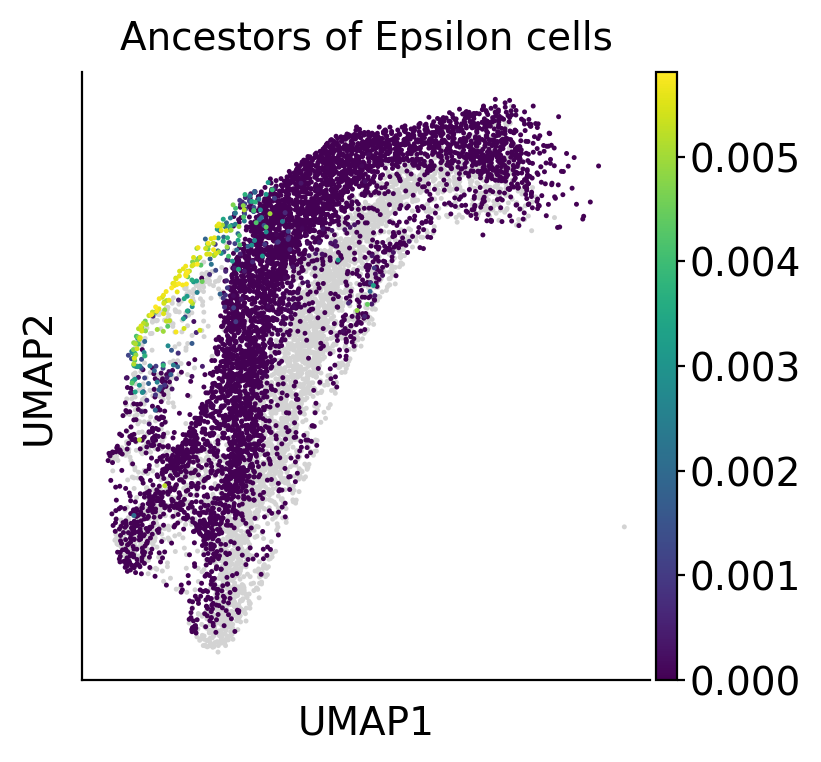

In [45]:
fig = mpl.pull(tp0, time_points=[14.5], basis="umap", title="Ancestors of Epsilon cells", save="Epsilon_anc_1.png")
fig.figure

In [73]:
tp0.push(14.5, 15.5, data="refinement", subset="Epsilon")

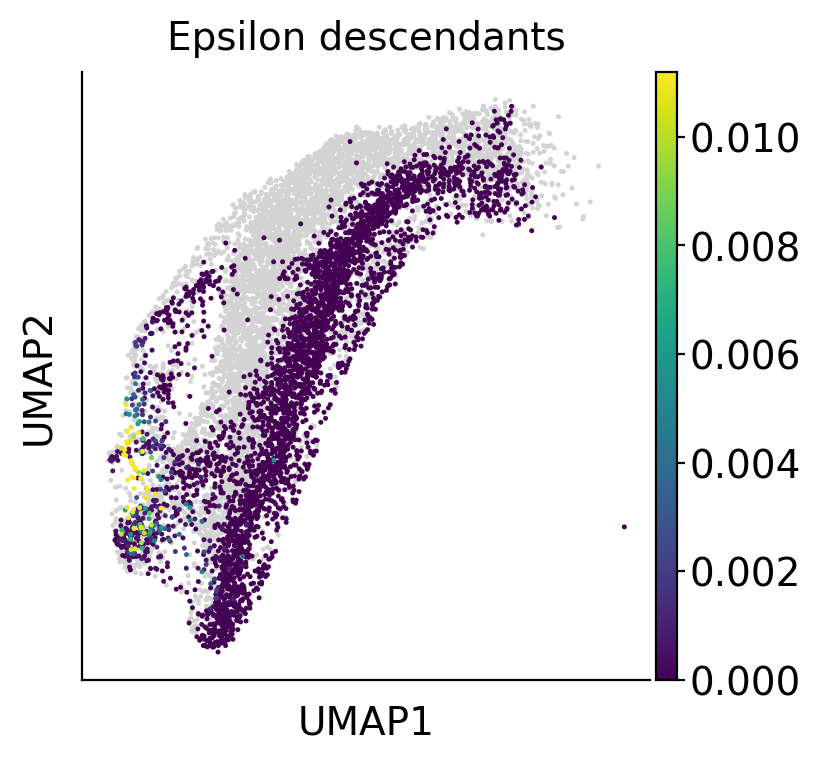

In [74]:
fig = mpl.push(tp0, time_points=[15.5], basis="umap", title="Epsilon descendants", save="Epsilon_desc_0.png")
fig.figure

In [ ]:
fig = mpl.push(tp0, time_points=[14.5], basis="umap", title="Epsilon cells at E14.5", save="Epsilon_desc_1.png")
fig.figure

In [46]:
tp0.pull(14.5, 15.5, data="celltype", subset="Eps. progenitors")

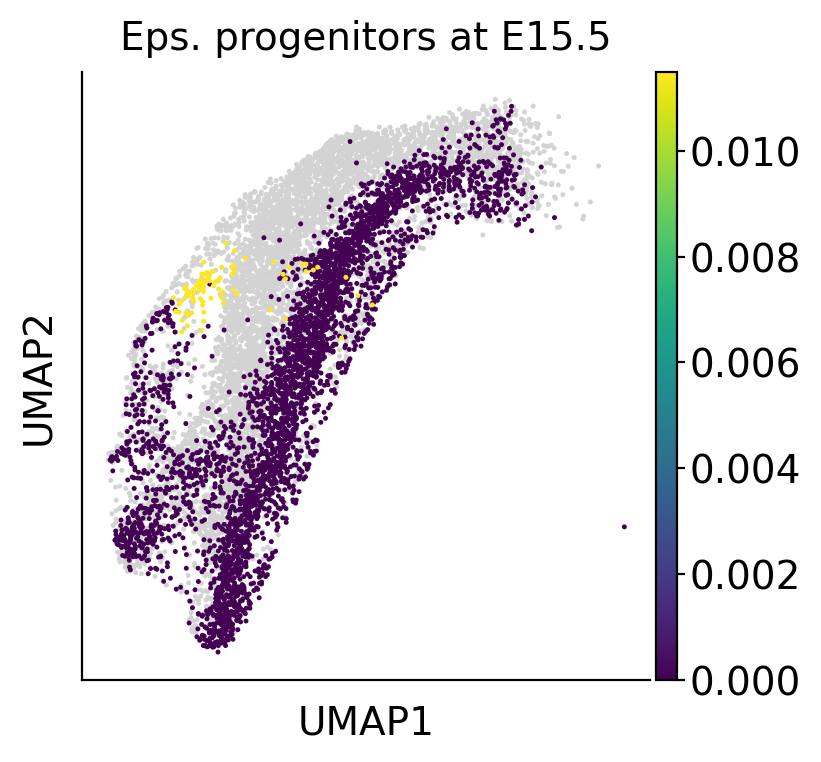

In [47]:
fig = mpl.pull(tp0, time_points=[15.5], basis="umap", title="Eps. progenitors at E15.5", save="eps_prog_anc_0.png")
fig.figure

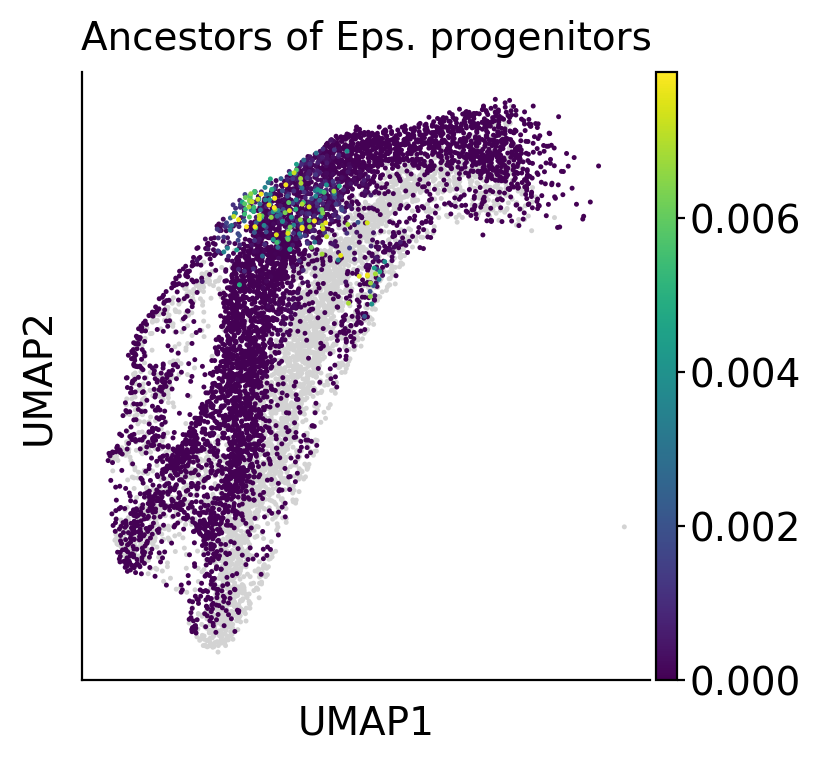

In [48]:
fig = mpl.pull(tp0, time_points=[14.5], basis="umap", title="Ancestors of Eps. progenitors", save="eps_prog_anc_1.png")
fig.figure

In [49]:
tp0.pull(14.5, 15.5, data="celltype", subset="Delta")

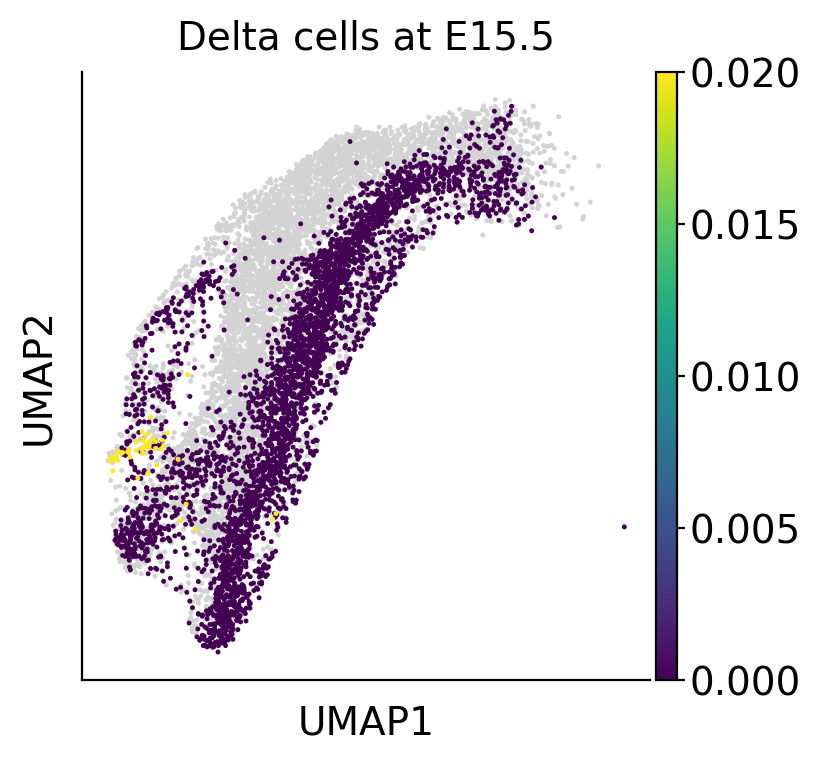

In [50]:
fig = mpl.pull(tp0, time_points=[15.5], basis="umap", title="Delta cells at E15.5", save="delta_anc_0.png")
fig.figure

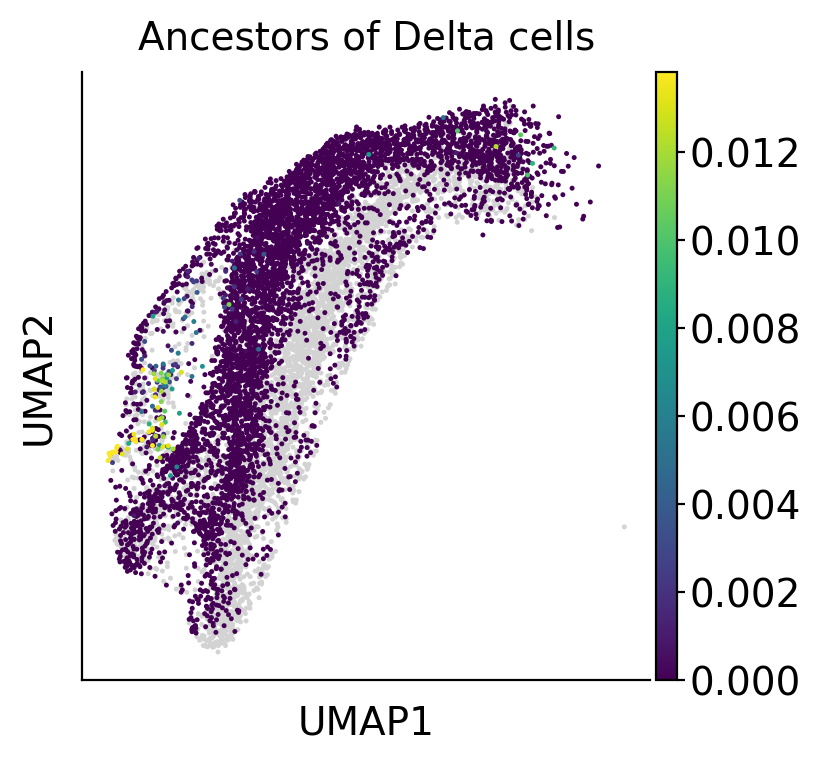

In [52]:
fig = mpl.pull(tp0, time_points=[14.5], basis="umap", title="Ancestors of Delta cells", save="delta_anc_1.png")
fig.figure

In [53]:
tp0.pull(14.5, 15.5, data="refinement", subset="Fev+ Delta,0")

In [56]:
fig = mpl.pull(tp0, vmax="p99", time_points=[14.5], basis="umap", title="Ancestors of Fev+ Delta,0 cells", save="fev_delta0_anc_1.png")
fig.figure

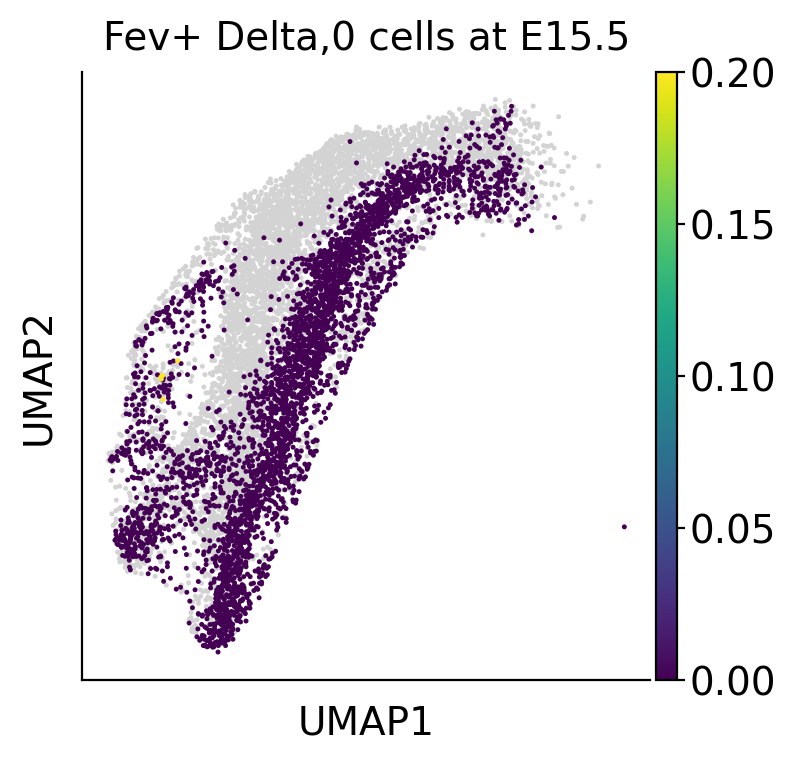

In [57]:
fig = mpl.pull(tp0, time_points=[15.5], basis="umap", title="Fev+ Delta,0 cells at E15.5", save="fev_delta0_anc_0.png")
fig.figure

In [58]:
tp0.push(14.5, 15.5, data="refinement", subset="Fev+ Delta,0")

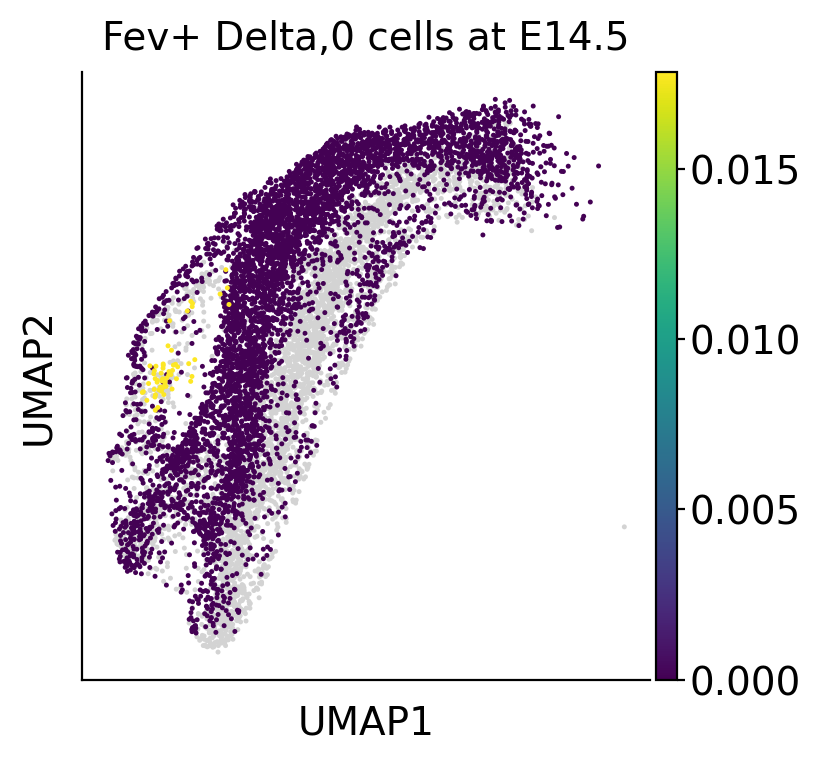

In [59]:
fig = mpl.push(tp0, time_points=[14.5], basis="umap", title="Fev+ Delta,0 cells at E14.5", save="fev_delta0_desc_0.png")
fig.figure

In [60]:
fig = mpl.push(tp0, time_points=[15.5], basis="umap", title="Descendants of Fev+ Delta,0 cells", save="fev_delta0_desc_1.png")
fig.figure

In [61]:
tp0.pull(14.5, 15.5, data="refinement", subset="Fev+ Delta,1")

In [62]:
fig = mpl.pull(tp0, time_points=[14.5], basis="umap", title="Ancestors of Fev+ Delta,1 cells", save="fev_delta1_anc_1.png")
fig.figure

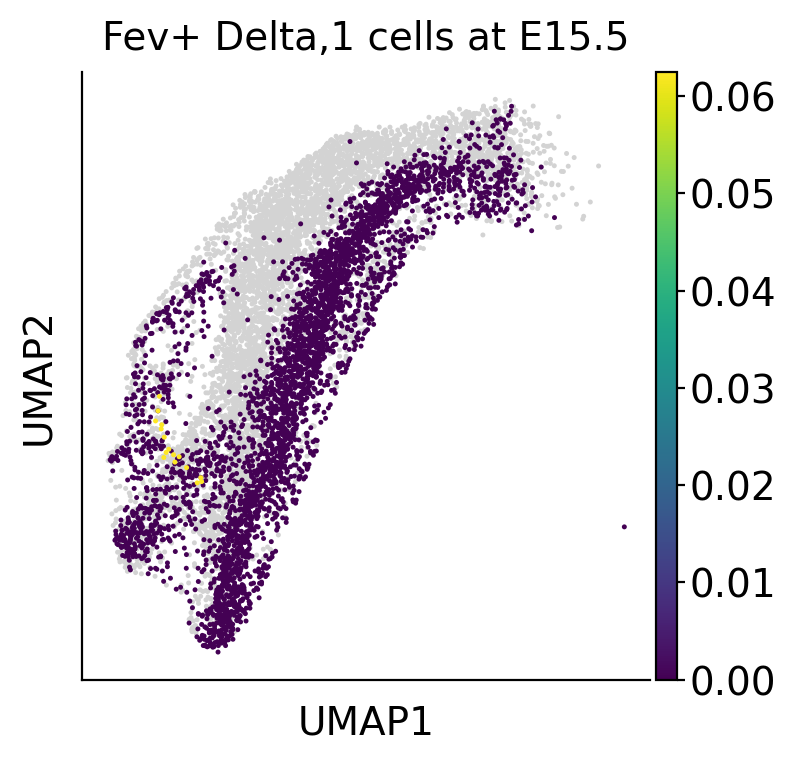

In [63]:
fig = mpl.pull(tp0, time_points=[15.5], basis="umap", title="Fev+ Delta,1 cells at E15.5", save="fev_delta1_anc_0.png")
fig.figure

In [64]:
tp0.push(14.5, 15.5, data="refinement", subset="Fev+ Delta,1")

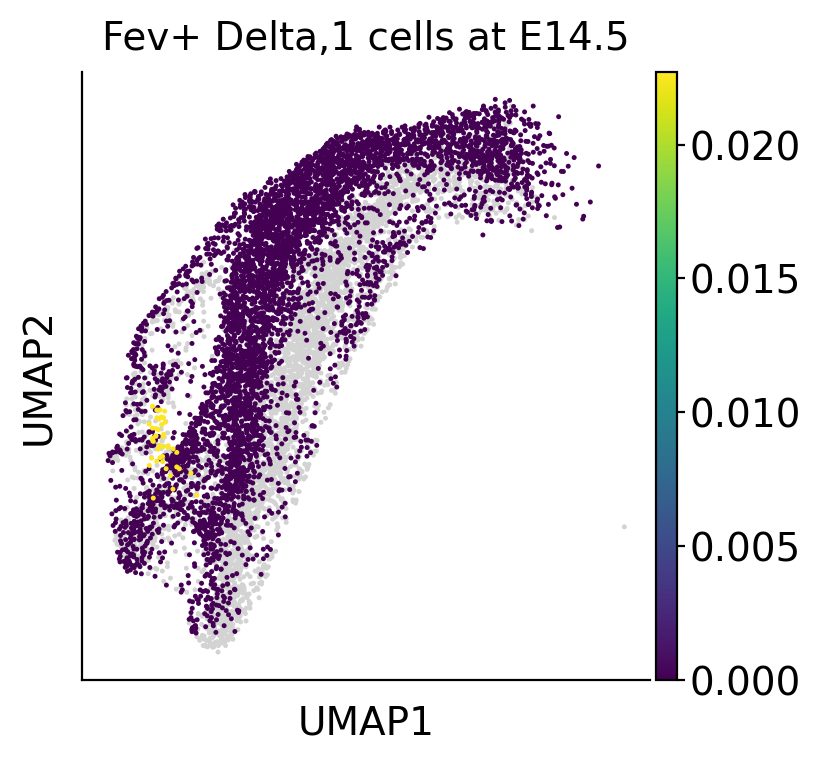

In [65]:
fig = mpl.push(tp0, time_points=[14.5], basis="umap", title="Fev+ Delta,1 cells at E14.5", save="fev_delta1_desc_0.png")
fig.figure

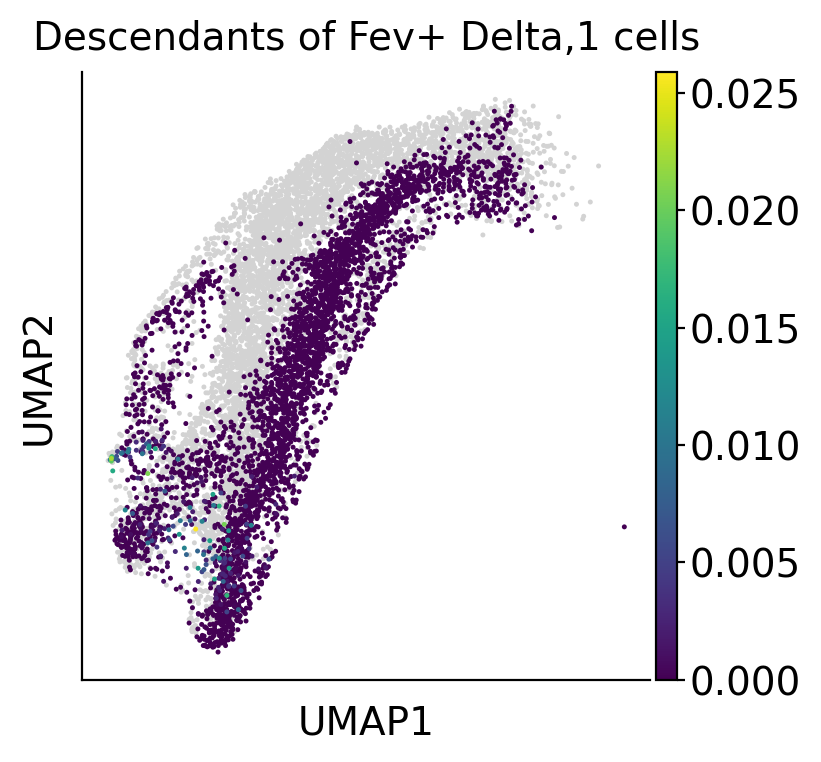

In [66]:
fig = mpl.push(tp0, time_points=[15.5], basis="umap", title="Descendants of Fev+ Delta,1 cells", save="fev_delta1_desc_1.png")
fig.figure

In [67]:
tp0.pull(14.5, 15.5, data="refinement", subset="Fev+ Delta,2")

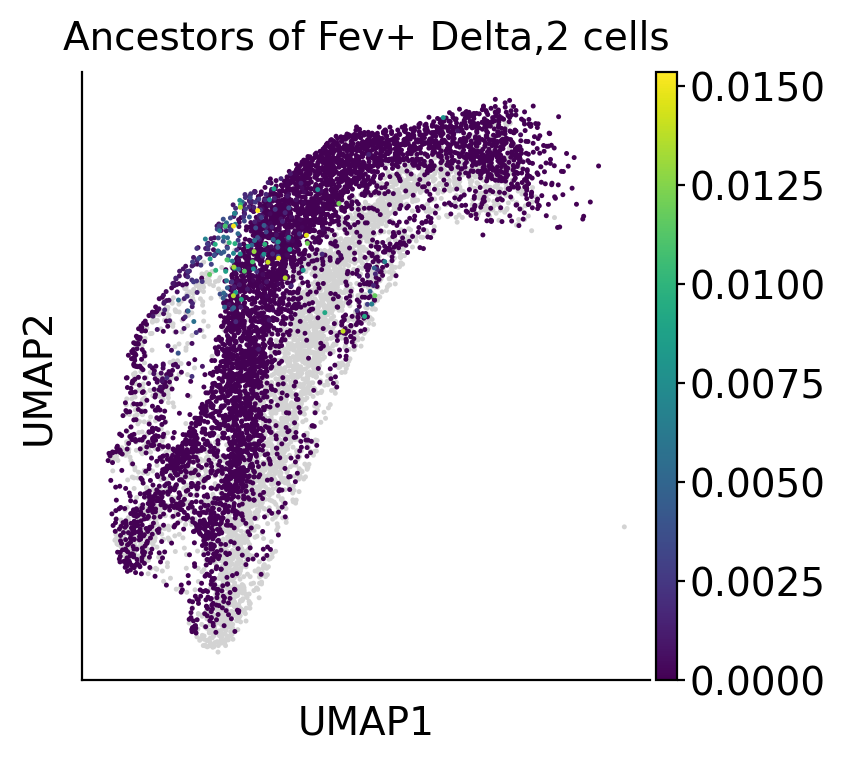

In [68]:
fig = mpl.pull(tp0, time_points=[14.5], basis="umap", title="Ancestors of Fev+ Delta,2 cells", save="fev_delta2_anc_1.png")
fig.figure

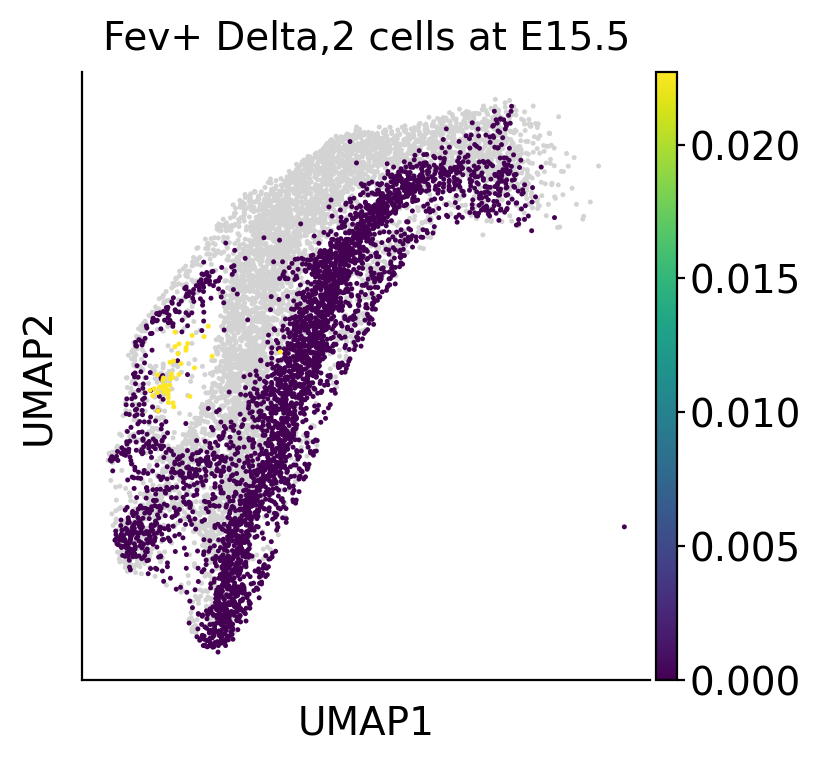

In [69]:
fig = mpl.pull(tp0, time_points=[15.5], basis="umap", title="Fev+ Delta,2 cells at E15.5", save="fev_delta2_anc_0.png")
fig.figure

In [70]:
tp0.push(14.5, 15.5, data="refinement", subset="Fev+ Delta,1")

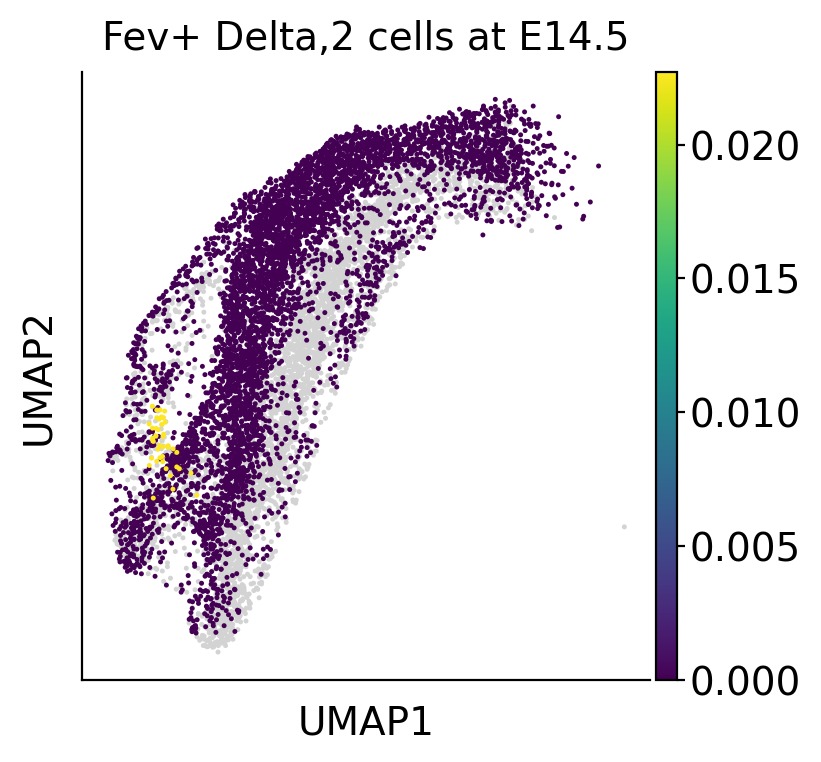

In [71]:
fig = mpl.push(tp0, time_points=[14.5], basis="umap", title="Fev+ Delta,2 cells at E14.5", save="fev_delta2_desc_0.png")
fig.figure

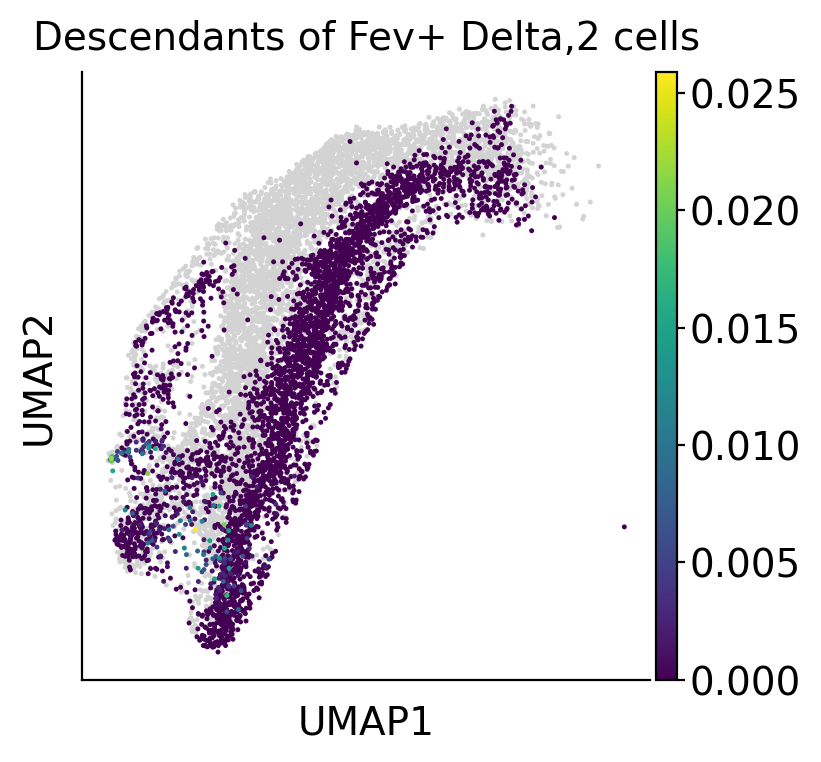

In [72]:
fig = mpl.push(tp0, time_points=[15.5], basis="umap", title="Descendants of Fev+ Delta,2 cells", save="fev_delta2_desc_1.png")
fig.figure

In [72]:
_ = tp0.cell_transition(14.5, 15.5, "refinement", "refinement", forward=False)

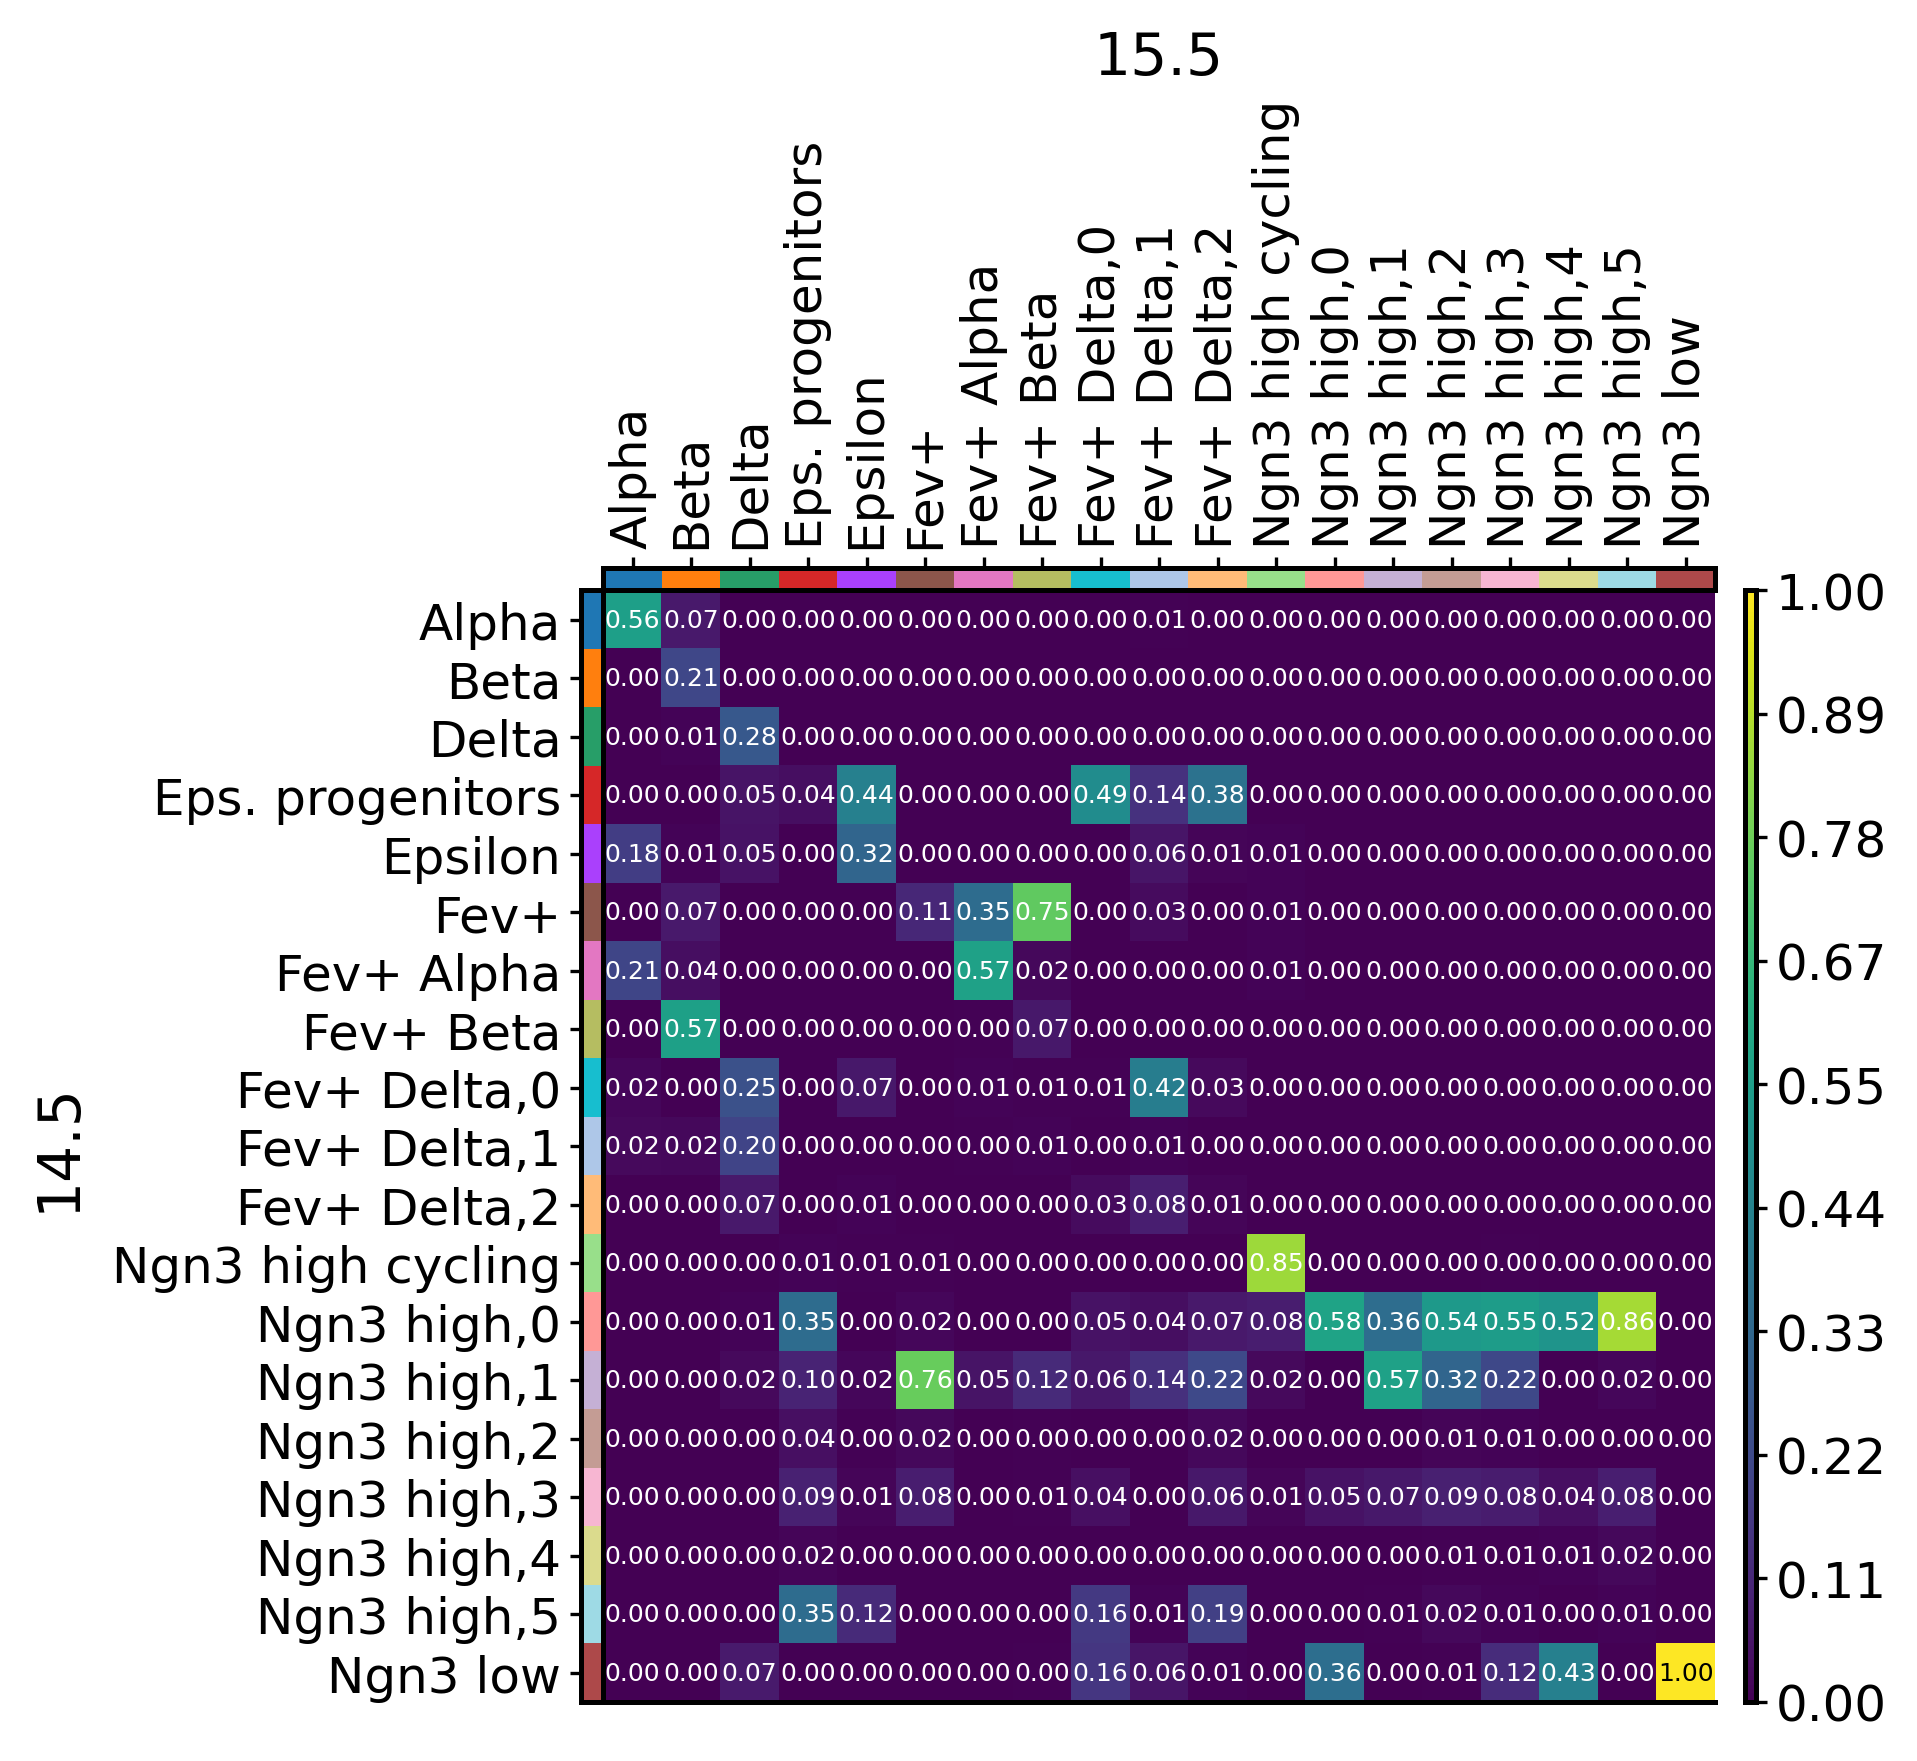

In [73]:
mpl.cell_transition(tp0, dpi=150, fontsize=6)

In [74]:
_ = tp0.cell_transition(14.5, 15.5, "refinement", "refinement", forward=True)

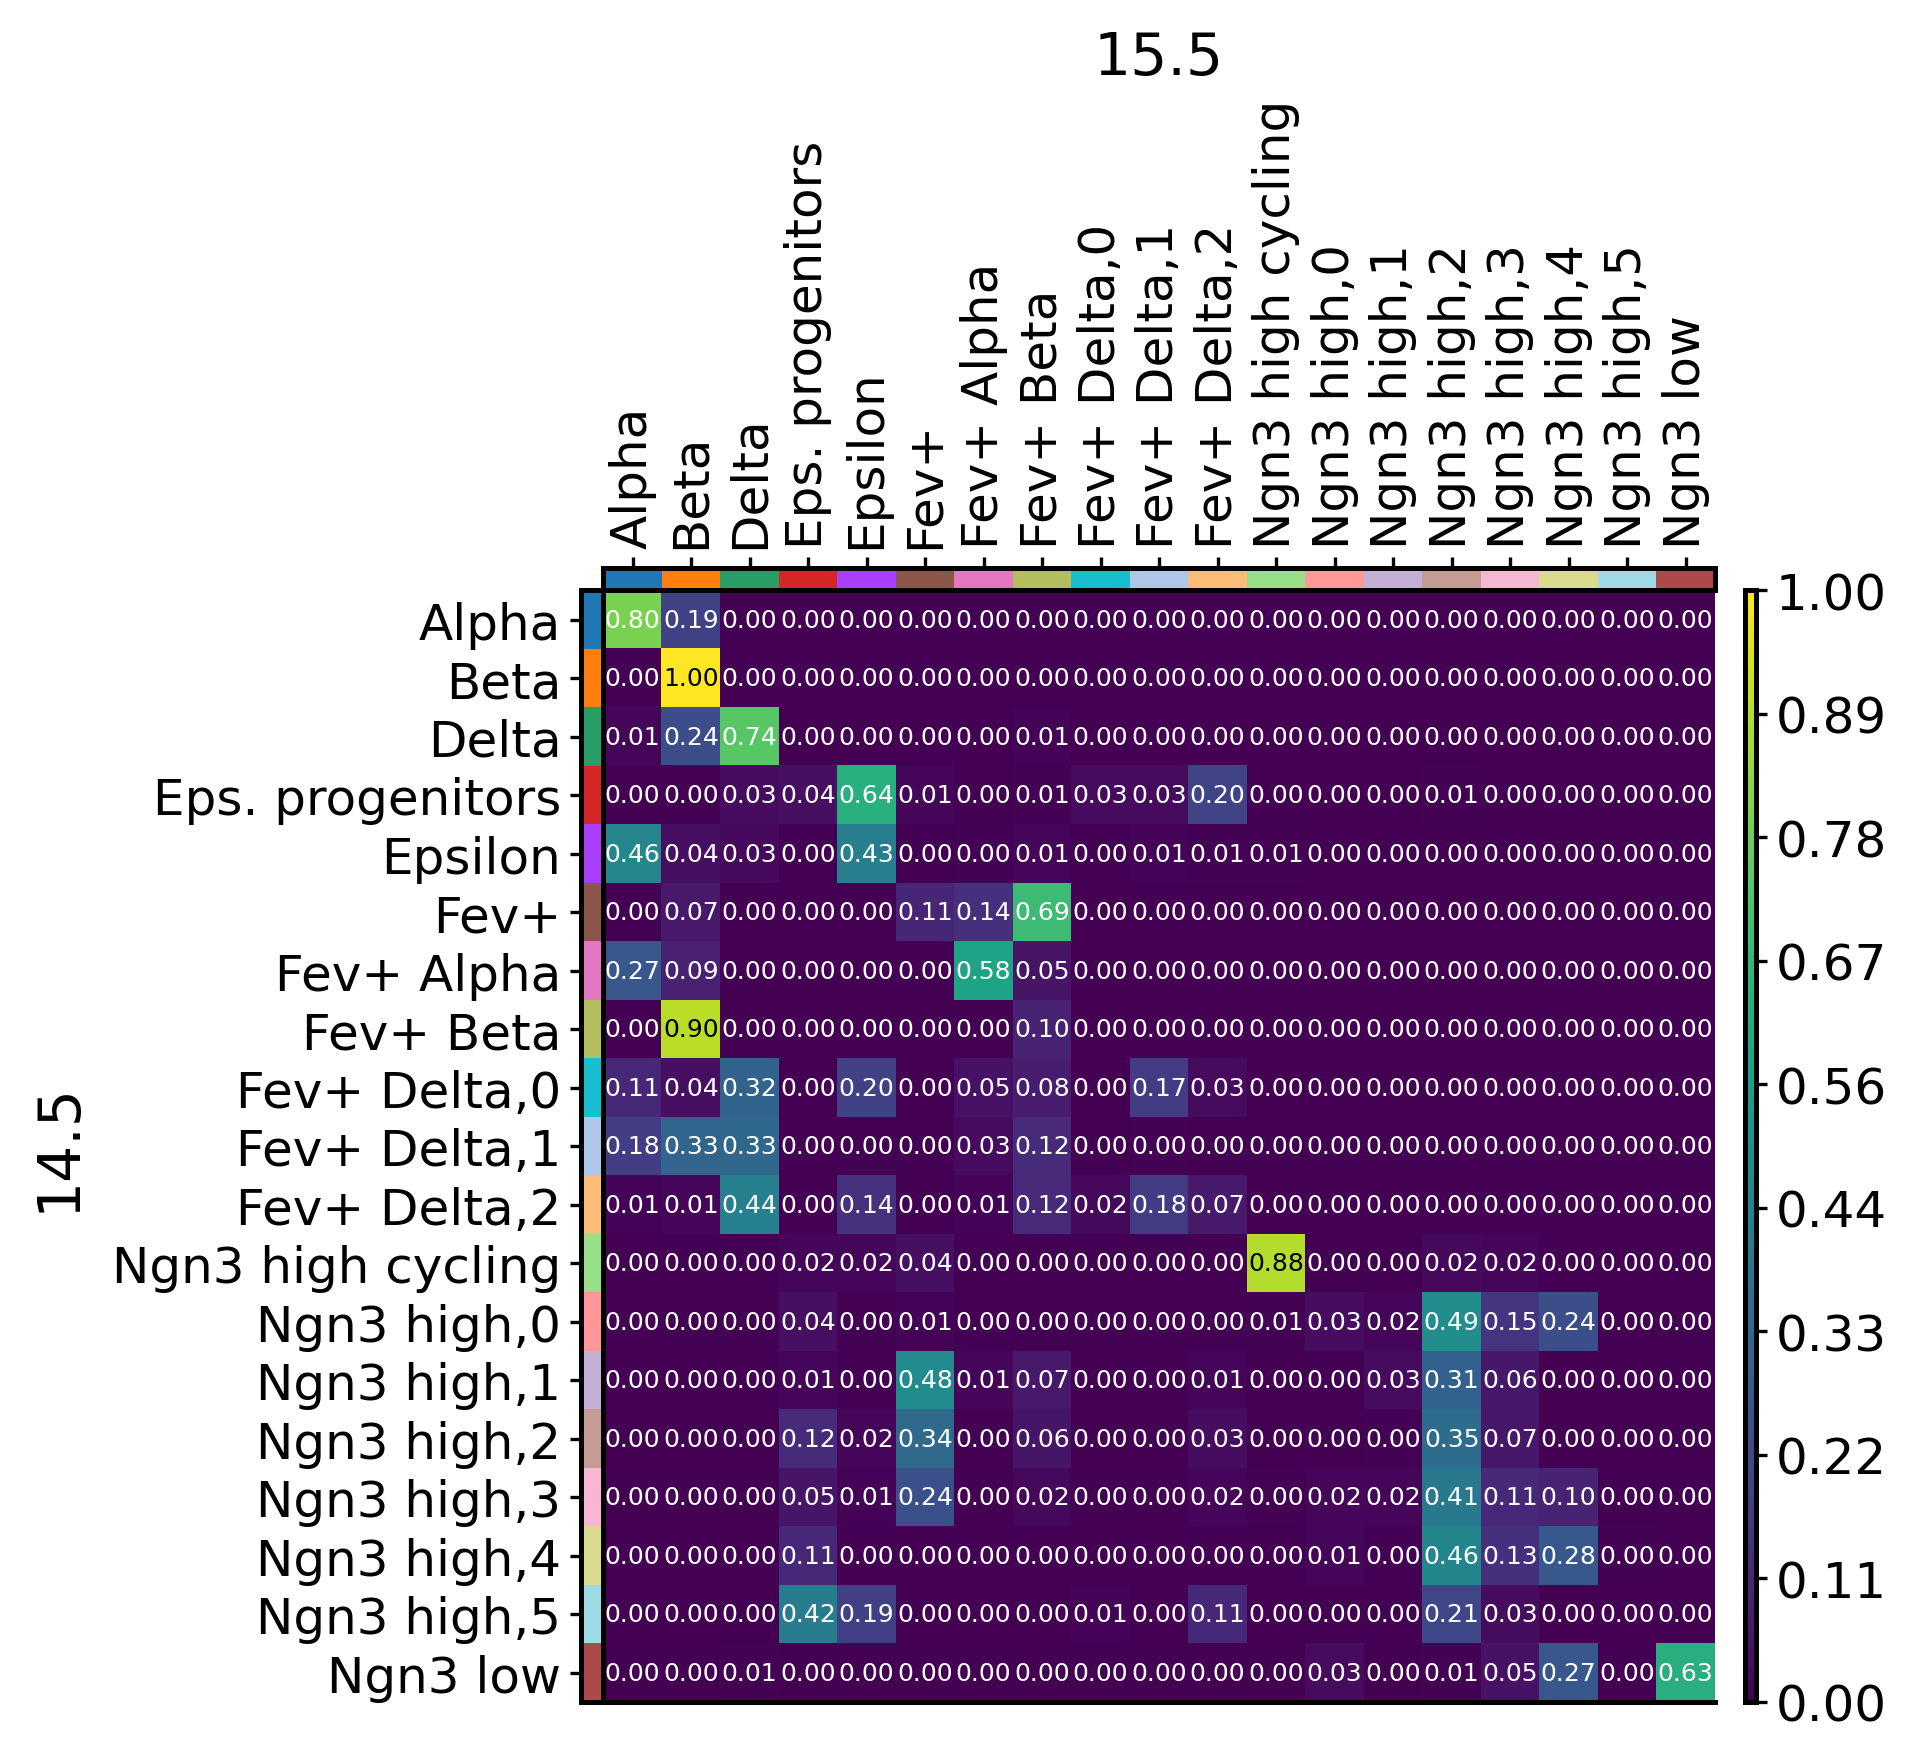

In [75]:
mpl.cell_transition(tp0, dpi=150, fontsize=6)